In [1]:
import numpy as np
np.random.seed(0)
import gym

env = gym.make('Taxi-v3')
env = env.unwrapped
env.seed(0)
print('观察空间 = {}'.format(env.observation_space))
print('动作空间 = {}'.format(env.action_space))
print('状态数量 = {}'.format(env.observation_space.n))
print('动作数量 = {}'.format(env.action_space.n))

观察空间 = Discrete(500)
动作空间 = Discrete(6)
状态数量 = 500
动作数量 = 6


In [2]:
def play_sarsa(env, agent, train=False, render=False):
    '''
    SARSA
    :param env: 环境
    :param agent: 智能体
    :param train: 是否训练
    :param render: 是否render
    :return:
    '''
    # 轨迹回报
    episode_reward = 0
    # 状态
    observation = env.reset()
    # 动作
    action = agent.decide(observation)
    while True:
        if render:
            env.render()
        next_observation, reward, done, _ = env.step(action)
        episode_reward += reward
        next_action = agent.decide(next_observation)
        if train:
            agent.learn(observation, action, reward, next_observation, next_action, done)
        if done:
            break
        observation, action = next_observation, next_action
    return episode_reward

In [3]:
class SARSALambdaAgent:
    def __init__(self, env, lambd=0.6, beta=1.,gamma=0.9, learning_rate=0.1, epsilon=.01):
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.action_n = env.action_space.n
        self.q = np.zeros((env.observation_space.n, env.action_space.n))
        self.lambd = lambd
        self.beta = beta
        self.e = np.zeros((env.observation_space.n, env.action_space.n))

    def decide(self, state):
        '''
        epsilon贪心策略
        :param state: 状态
        :return:
        '''
        if np.random.uniform() > self.epsilon:
            action = self.q[state].argmax()
        else:
            action = np.random.randint(self.action_n)
        return action

    def learn(self, state, action, reward, next_state, next_action,done):
        # 更新资格迹
        self.e *= (self.lambd * self.gamma)
        self.e[state, action] = 1. + self.beta * self.e[state, action]

        # 更新价值
        u = reward + self.gamma * self.q[next_state, next_action] * (1. - done)
        td_error = u - self.q[state, action]
        self.q += self.learning_rate * self.e * td_error
        if done:
            self.e *= 0.


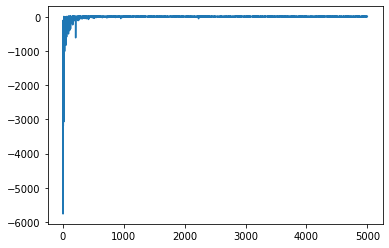

In [4]:
import matplotlib.pyplot as plt

agent = SARSALambdaAgent(env)

# 训练
episodes = 5000
episode_rewards = []
for episode in range(episodes):
    episode_reward = play_sarsa(env, agent, train=True)
    episode_rewards.append(episode_reward)

plt.plot(episode_rewards)

In [5]:
# 测试
agent.epsilon = 0. # 取消探索

episode_rewards = [play_sarsa(env, agent, train=False) for _ in range(100)]
print('平均回合奖励 = {} / {} = {}'.format(sum(episode_rewards),len(episode_rewards), np.mean(episode_rewards)))

平均回合奖励 = 729 / 100 = 7.29
